#Basic Knowledge Graph with Neo4j Aura
Made by: Wilfredo Aaron Sosa Ramos

https://console-preview.neo4j.io/

Resource: https://towardsdatascience.com/building-knowledge-graphs-with-llm-graph-transformer-a91045c49b59

In [19]:
!pip install --quiet neo4j langchain-community langchain-experimental langchain-openai json-repair langchain_neo4j

In [20]:
from langchain_neo4j.graphs.neo4j_graph import Neo4jGraph

In [3]:
import getpass
passsword = getpass.getpass("Enter the Neo4j instance password: ")

Enter the Neo4j instance password: ··········


In [22]:
graph = Neo4jGraph(
    url="neo4j+s://5ef68eae.databases.neo4j.io",
    username="neo4j",
    password=passsword,
    refresh_schema=False
)

In [23]:
def clean_graph():
    query = """
    MATCH (n)
    DETACH DELETE n
    """
    graph.query(query)

In [6]:
from langchain_core.documents import Document

text = """
Large Language Models (LLMs) are advanced artificial intelligence systems designed to understand and generate human-like text. These models, such as OpenAI's GPT series or Google's Gemini, are trained on vast datasets, enabling them to perform a wide range of natural language processing tasks.
LLMs are employed in numerous applications, including chatbots, content creation, translation services, and even aiding scientific research by generating hypotheses or summarizing large volumes of data.
Their capabilities are continually expanding, allowing for improvements in conversational AI, context understanding, and specialized domain expertise.
However, LLMs also present challenges, such as ethical considerations, potential biases in training data, and the computational resources required for their development and deployment.
Also, ChatGPT!
"""
documents = [Document(page_content=text)]

In [7]:
from langchain_openai import ChatOpenAI
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI api key")

llm = ChatOpenAI(model='gpt-4o-mini')

OpenAI api key··········


##Without any schema

In [8]:
from langchain_experimental.graph_transformers import LLMGraphTransformer

no_schema = LLMGraphTransformer(llm=llm)

In [28]:
data = await no_schema.aconvert_to_graph_documents(documents)
print(data)
graph.add_graph_documents(data)

[GraphDocument(nodes=[Node(id='Large Language Models', type='Concept', properties={}), Node(id="Openai'S Gpt Series", type='Concept', properties={}), Node(id="Google'S Gemini", type='Concept', properties={}), Node(id='Chatbots', type='Application', properties={}), Node(id='Content Creation', type='Application', properties={}), Node(id='Translation Services', type='Application', properties={}), Node(id='Scientific Research', type='Application', properties={}), Node(id='Conversational Ai', type='Concept', properties={}), Node(id='Context Understanding', type='Concept', properties={}), Node(id='Specialized Domain Expertise', type='Concept', properties={}), Node(id='Ethical Considerations', type='Challenge', properties={}), Node(id='Potential Biases', type='Challenge', properties={}), Node(id='Computational Resources', type='Challenge', properties={}), Node(id='Chatgpt', type='Concept', properties={})], relationships=[Relationship(source=Node(id='Large Language Models', type='Concept', pro

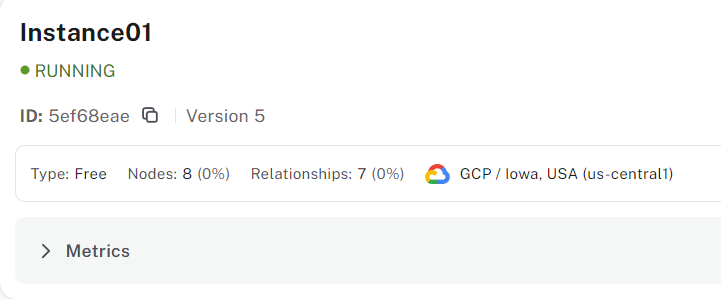

In [30]:
clean_graph()

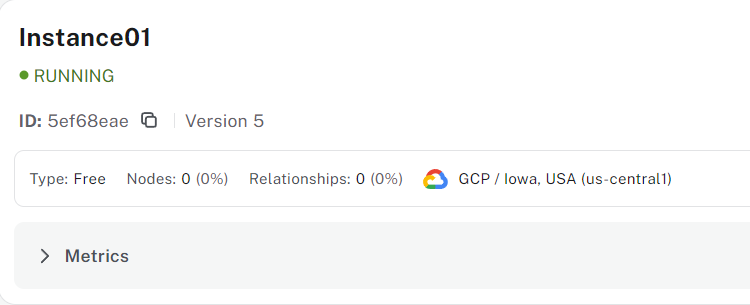

In [25]:
no_schema_prompt = LLMGraphTransformer(llm=llm, ignore_tool_usage=True)
data = await no_schema_prompt.aconvert_to_graph_documents(documents)
graph.add_graph_documents(data)

In [26]:
print(data)

[GraphDocument(nodes=[Node(id='summarizing large volumes of data', type='Function', properties={}), Node(id='capabilities', type='Characteristic', properties={}), Node(id='understand and generate human-like text', type='Function', properties={}), Node(id='potential biases in training data', type='Challenge', properties={}), Node(id='computational resources', type='Requirement', properties={}), Node(id='specialized domain expertise', type='Function', properties={}), Node(id='context understanding', type='Function', properties={}), Node(id='content creation', type='Application', properties={}), Node(id='improvements in conversational AI', type='Function', properties={}), Node(id='ethical considerations', type='Challenge', properties={}), Node(id='chatbots', type='Application', properties={}), Node(id='scientific research', type='Application', properties={}), Node(id="Google's Gemini", type='Technology', properties={}), Node(id='ChatGPT', type='Technology', properties={}), Node(id="OpenAI

In [27]:
clean_graph()

###Query the results:

In [31]:
data = await no_schema.aconvert_to_graph_documents(documents)
print(data)
graph.add_graph_documents(data)

[GraphDocument(nodes=[Node(id='Large Language Models', type='Concept', properties={}), Node(id="Openai'S Gpt Series", type='Concept', properties={}), Node(id="Google'S Gemini", type='Concept', properties={}), Node(id='Chatgpt', type='Concept', properties={}), Node(id='Natural Language Processing', type='Concept', properties={}), Node(id='Applications', type='Concept', properties={}), Node(id='Ethical Considerations', type='Concept', properties={}), Node(id='Potential Biases', type='Concept', properties={}), Node(id='Computational Resources', type='Concept', properties={})], relationships=[Relationship(source=Node(id='Large Language Models', type='Concept', properties={}), target=Node(id="Openai'S Gpt Series", type='Concept', properties={}), type='IS_A', properties={}), Relationship(source=Node(id='Large Language Models', type='Concept', properties={}), target=Node(id="Google'S Gemini", type='Concept', properties={}), type='IS_A', properties={}), Relationship(source=Node(id='Large Langu

In [32]:
cypher_query = """
MATCH (n)-[r]->(m)
RETURN n, r, m
"""
results = graph.query(cypher_query)

In [33]:
results

[{'n': {'id': 'Applications'},
  'r': ({'id': 'Applications'}, 'INCLUDES', {'id': 'Chatgpt'}),
  'm': {'id': 'Chatgpt'}},
 {'n': {'id': 'Large Language Models'},
  'r': ({'id': 'Large Language Models'},
   'IS_A',
   {'id': "Openai'S Gpt Series"}),
  'm': {'id': "Openai'S Gpt Series"}},
 {'n': {'id': 'Large Language Models'},
  'r': ({'id': 'Large Language Models'}, 'IS_A', {'id': "Google'S Gemini"}),
  'm': {'id': "Google'S Gemini"}},
 {'n': {'id': 'Large Language Models'},
  'r': ({'id': 'Large Language Models'},
   'EMPLOYED_IN',
   {'id': 'Applications'}),
  'm': {'id': 'Applications'}},
 {'n': {'id': 'Large Language Models'},
  'r': ({'id': 'Large Language Models'},
   'PRESENTS',
   {'id': 'Ethical Considerations'}),
  'm': {'id': 'Ethical Considerations'}},
 {'n': {'id': 'Large Language Models'},
  'r': ({'id': 'Large Language Models'},
   'PRESENTS',
   {'id': 'Potential Biases'}),
  'm': {'id': 'Potential Biases'}},
 {'n': {'id': 'Large Language Models'},
  'r': ({'id': 'Large

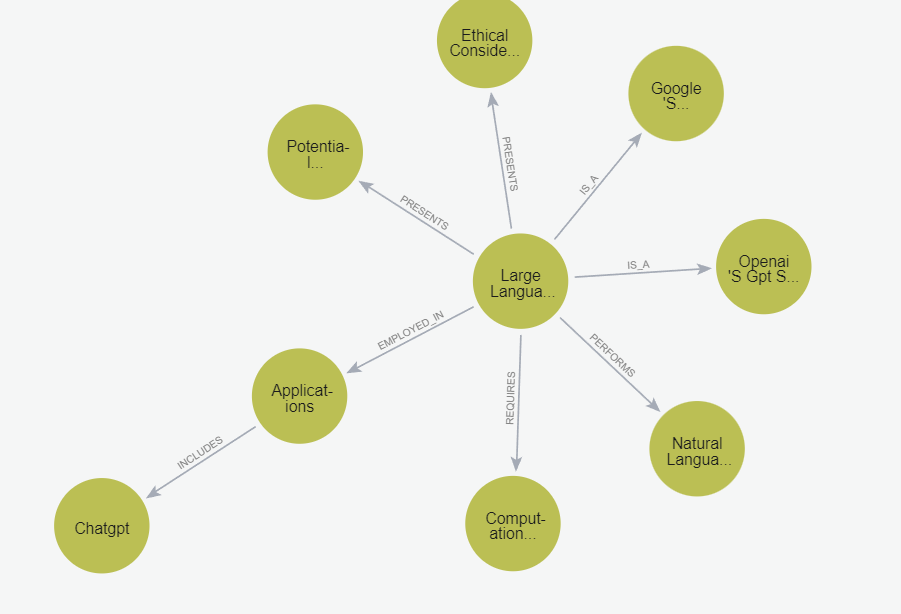

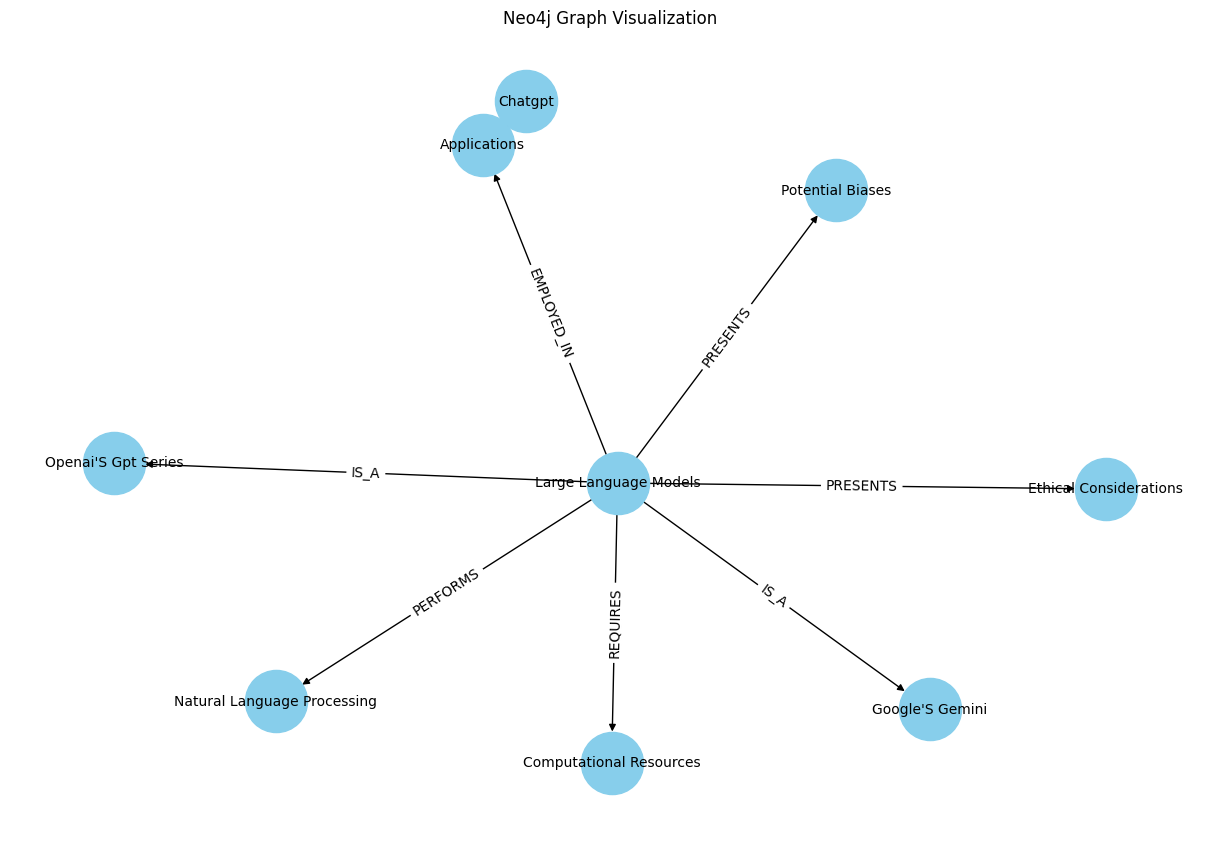

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
# Step 2: Build the NetworkX Graph
nx_graph = nx.DiGraph()

for record in results:
    node_start = record['n']['id']
    relationship = record['r']
    node_end = record['m']['id']

    rel_type = relationship[1]  # The second item in the tuple is the relationship type

    # Add nodes and edge to the graph
    nx_graph.add_node(node_start)
    nx_graph.add_node(node_end)
    nx_graph.add_edge(node_start, node_end, label=rel_type)

# Step 3: Visualize the Graph
def visualize_graph(graph):
    pos = nx.spring_layout(graph)  # Layout for visualization
    edge_labels = nx.get_edge_attributes(graph, 'label')

    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Neo4j Graph Visualization")
    plt.show()

# Step 4: Execute Visualization
visualize_graph(nx_graph)

In [37]:
clean_graph()

###Defining allowed nodes


In [38]:
allowed_nodes = ["Model", "Application", "Challenge", "Capability", "EthicalConcern"]
nodes_defined = LLMGraphTransformer(llm=llm, allowed_nodes=allowed_nodes)
data = await nodes_defined.aconvert_to_graph_documents(documents)
graph.add_graph_documents(data)

In [42]:
def get_results():
  cypher_query = """
  MATCH (n)-[r]->(m)
  RETURN n, r, m
  """
  results = graph.query(cypher_query)
  return results

In [40]:
def create_knowledge_graph_visual(results):
  nx_graph = nx.DiGraph()

  for record in results:
      node_start = record['n']['id']
      relationship = record['r']
      node_end = record['m']['id']

      rel_type = relationship[1]

      nx_graph.add_node(node_start)
      nx_graph.add_node(node_end)
      nx_graph.add_edge(node_start, node_end, label=rel_type)

  def visualize_graph(graph):
      pos = nx.spring_layout(graph)
      edge_labels = nx.get_edge_attributes(graph, 'label')

      plt.figure(figsize=(12, 8))
      nx.draw(graph, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10)
      nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
      plt.title("Neo4j Graph Visualization")
      plt.show()

  visualize_graph(nx_graph)

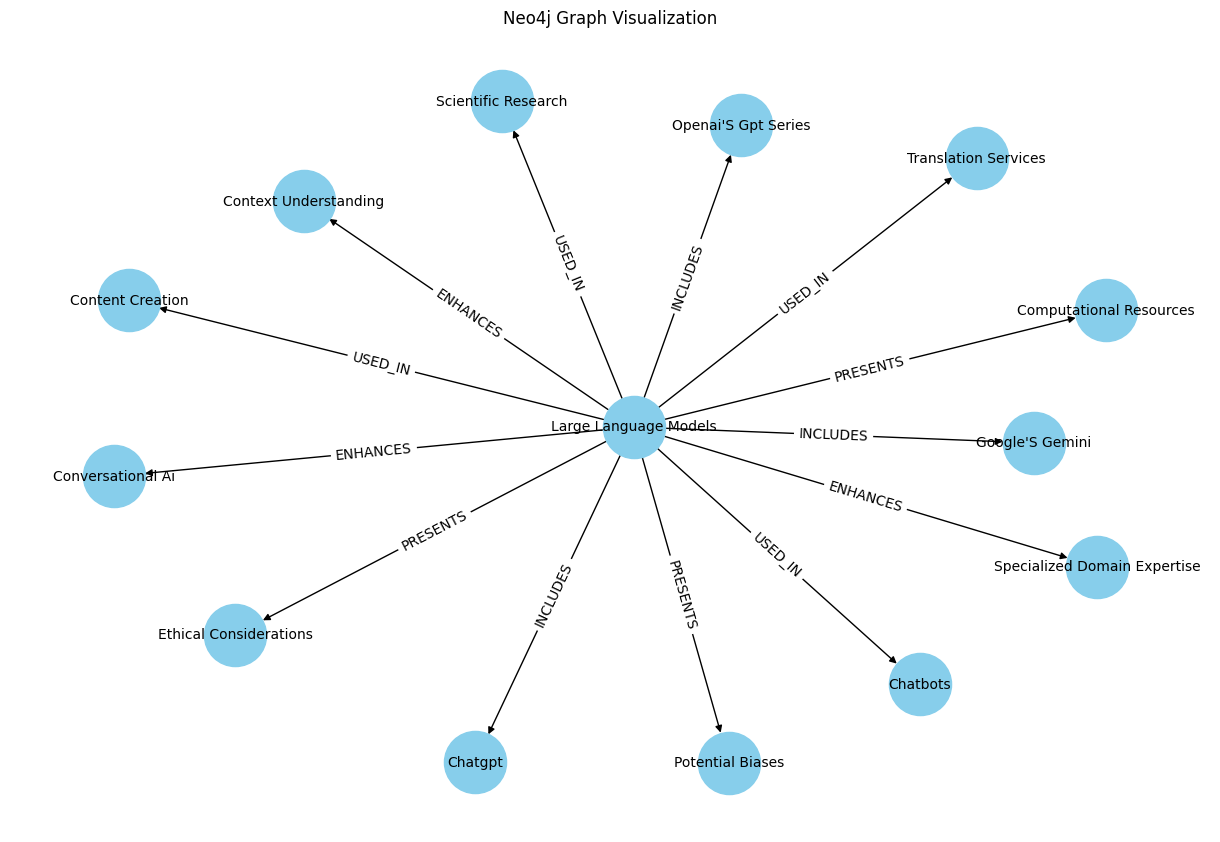

In [43]:
create_knowledge_graph_visual(get_results())

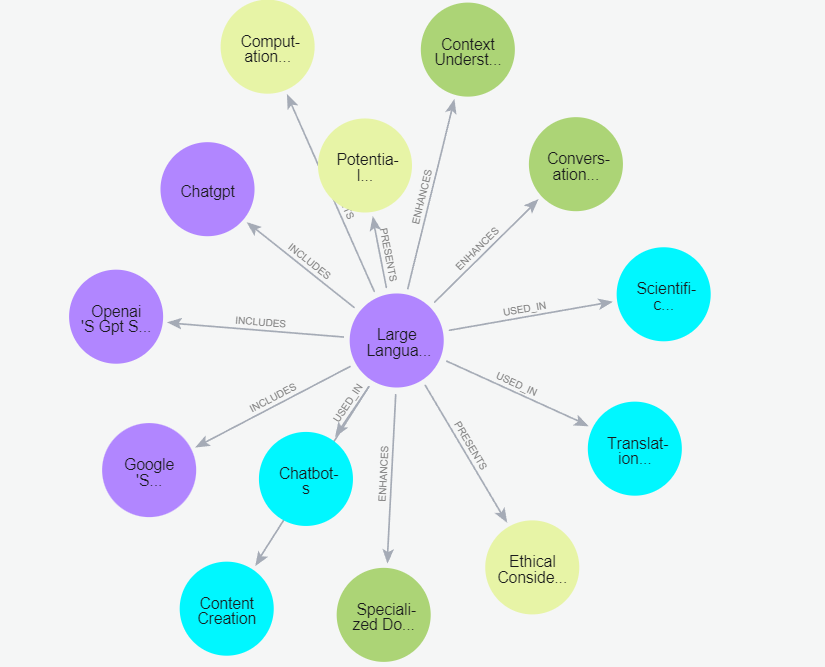

In [44]:
clean_graph()

###Defining allowed relationships


In [45]:
allowed_nodes = ["Model", "Application", "Challenge", "Capability", "EthicalConcern"]
allowed_relationships = ["USED_IN", "ADDRESSES", "HAS_CAPABILITY", "RAISES_CONCERN", "RELATES_TO"]
rels_defined = LLMGraphTransformer(
  llm=llm,
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships
)
data = await rels_defined.aconvert_to_graph_documents(documents)
graph.add_graph_documents(data)

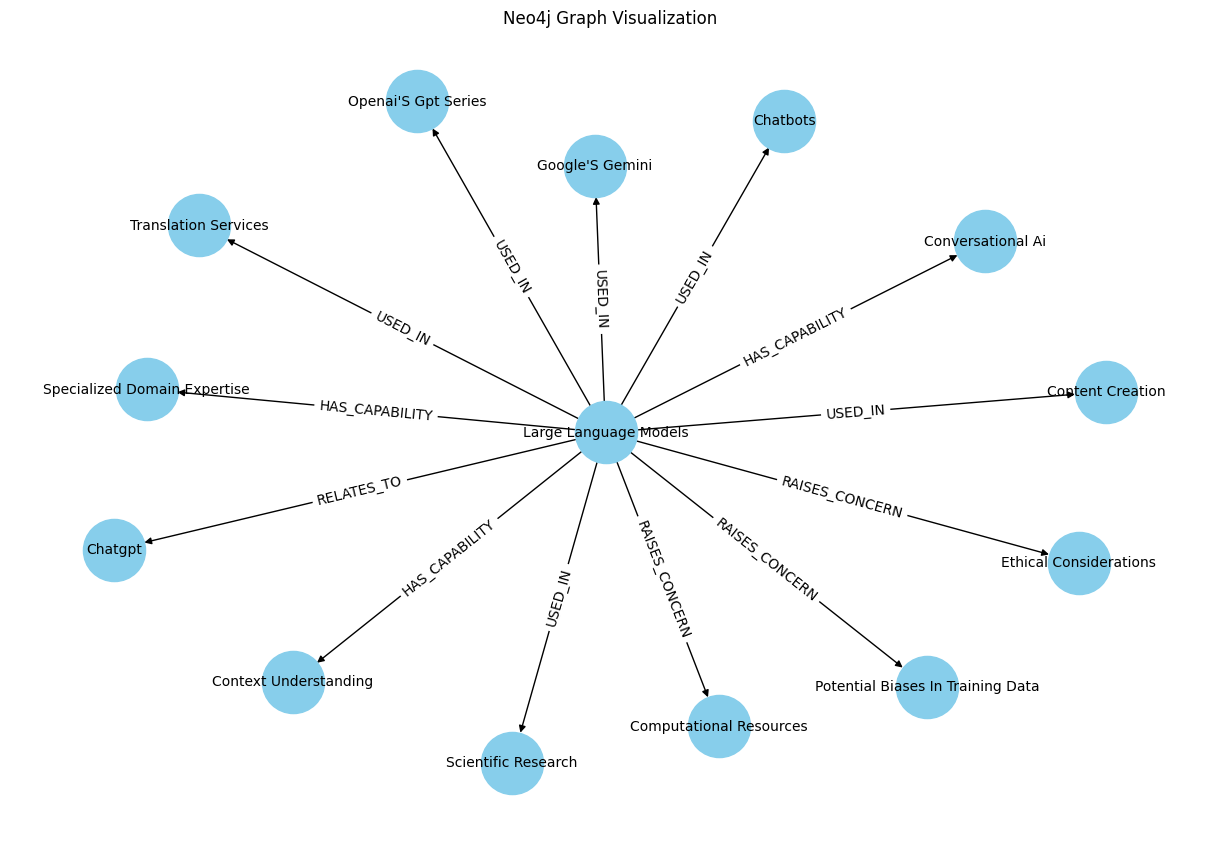

In [46]:
create_knowledge_graph_visual(get_results())

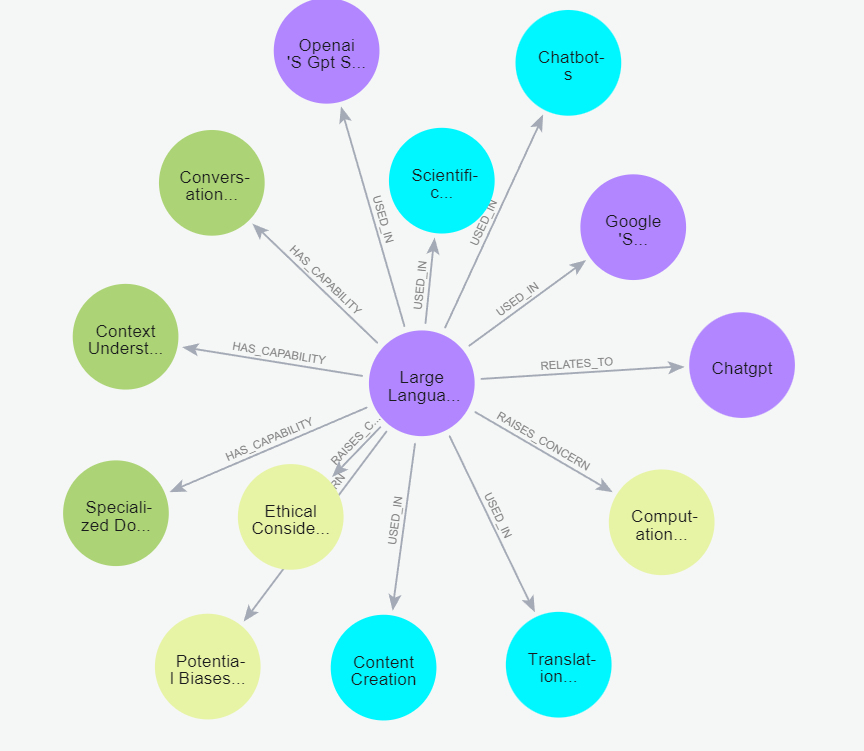

In [47]:
data

[GraphDocument(nodes=[Node(id='Large Language Models', type='Model', properties={}), Node(id="Openai'S Gpt Series", type='Model', properties={}), Node(id="Google'S Gemini", type='Model', properties={}), Node(id='Chatbots', type='Application', properties={}), Node(id='Content Creation', type='Application', properties={}), Node(id='Translation Services', type='Application', properties={}), Node(id='Scientific Research', type='Application', properties={}), Node(id='Conversational Ai', type='Capability', properties={}), Node(id='Context Understanding', type='Capability', properties={}), Node(id='Specialized Domain Expertise', type='Capability', properties={}), Node(id='Ethical Considerations', type='Challenge', properties={}), Node(id='Potential Biases In Training Data', type='Challenge', properties={}), Node(id='Computational Resources', type='Challenge', properties={}), Node(id='Chatgpt', type='Model', properties={})], relationships=[Relationship(source=Node(id='Large Language Models', t

In [48]:
clean_graph()

In [49]:
allowed_nodes = ["Model", "Application", "Challenge", "Capability", "EthicalConcern"]

allowed_relationships = [
    ("Model", "USED_IN", "Application"),
    ("Application", "ADDRESSES", "Challenge"),
    ("Model", "HAS_CAPABILITY", "Capability"),
    ("Model", "RAISES_CONCERN", "EthicalConcern"),
    ("Capability", "RELATES_TO", "Challenge")
]
rels_defined = LLMGraphTransformer(
  llm=llm,
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships
)
data = await rels_defined.aconvert_to_graph_documents(documents)

In [54]:
graph.add_graph_documents(data)

In [53]:
data

[GraphDocument(nodes=[Node(id='Large Language Models', type='Model', properties={}), Node(id="Openai'S Gpt Series", type='Model', properties={}), Node(id="Google'S Gemini", type='Model', properties={}), Node(id='Chatbots', type='Application', properties={}), Node(id='Content Creation', type='Application', properties={}), Node(id='Translation Services', type='Application', properties={}), Node(id='Scientific Research', type='Application', properties={}), Node(id='Conversational Ai', type='Capability', properties={}), Node(id='Context Understanding', type='Capability', properties={}), Node(id='Specialized Domain Expertise', type='Capability', properties={}), Node(id='Ethical Considerations', type='Challenge', properties={}), Node(id='Potential Biases In Training Data', type='Challenge', properties={}), Node(id='Computational Resources', type='Challenge', properties={})], relationships=[Relationship(source=Node(id='Large Language Models', type='Model', properties={}), target=Node(id='Chat

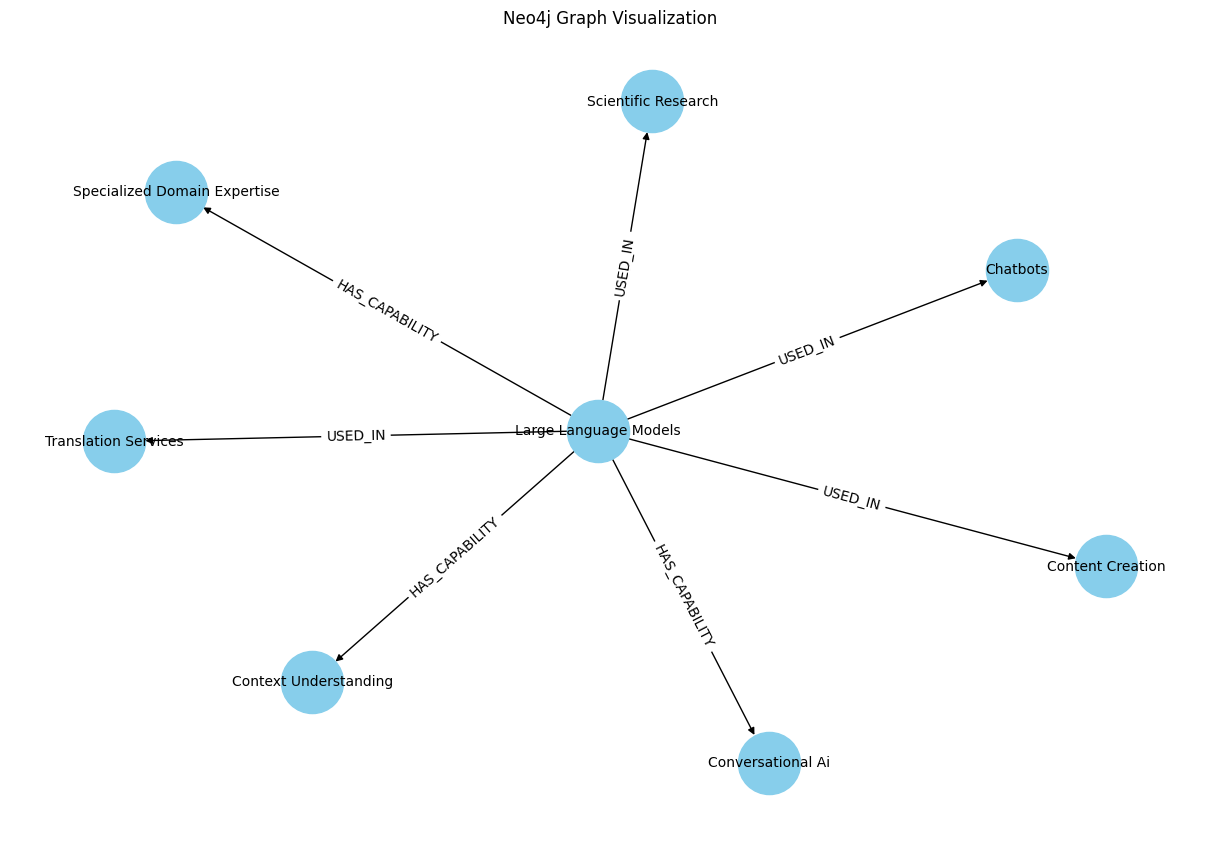

In [55]:
create_knowledge_graph_visual(get_results())

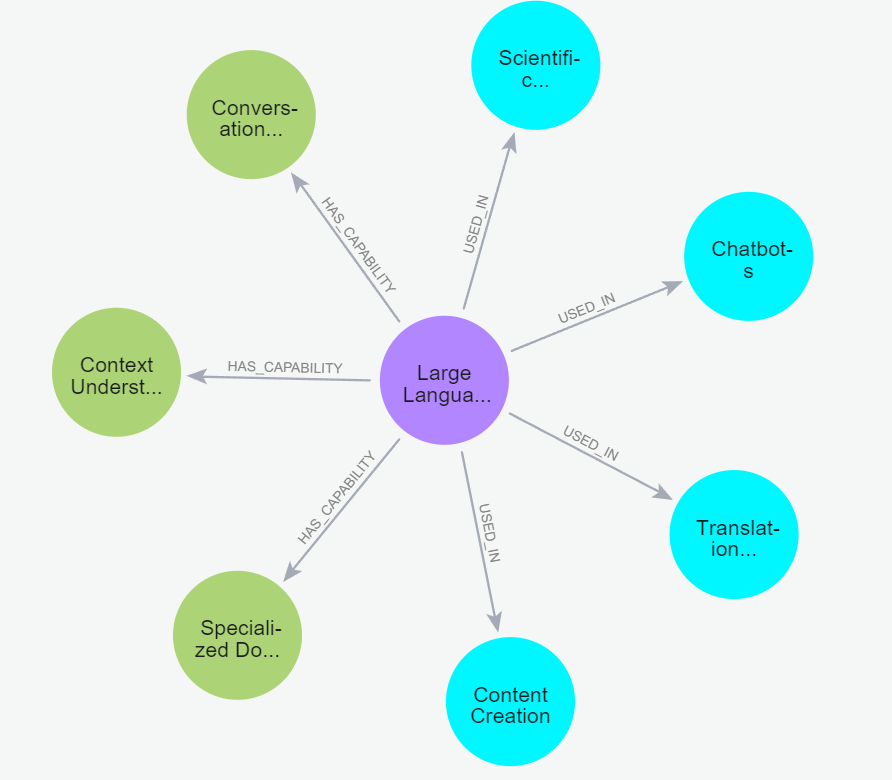

In [56]:
clean_graph()

###Defining properties


In [57]:
allowed_nodes = ["Model", "Application", "Challenge", "Capability", "EthicalConcern"]

allowed_relationships = [
    ("Model", "USED_IN", "Application"),
    ("Application", "ADDRESSES", "Challenge"),
    ("Model", "HAS_CAPABILITY", "Capability"),
    ("Model", "RAISES_CONCERN", "EthicalConcern"),
    ("Capability", "RELATES_TO", "Challenge")
]

node_properties=True
relationship_properties=True
props_defined = LLMGraphTransformer(
  llm=llm,
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships,
  node_properties=node_properties,
  relationship_properties=relationship_properties
)
data = await props_defined.aconvert_to_graph_documents(documents)
graph.add_graph_documents(data)

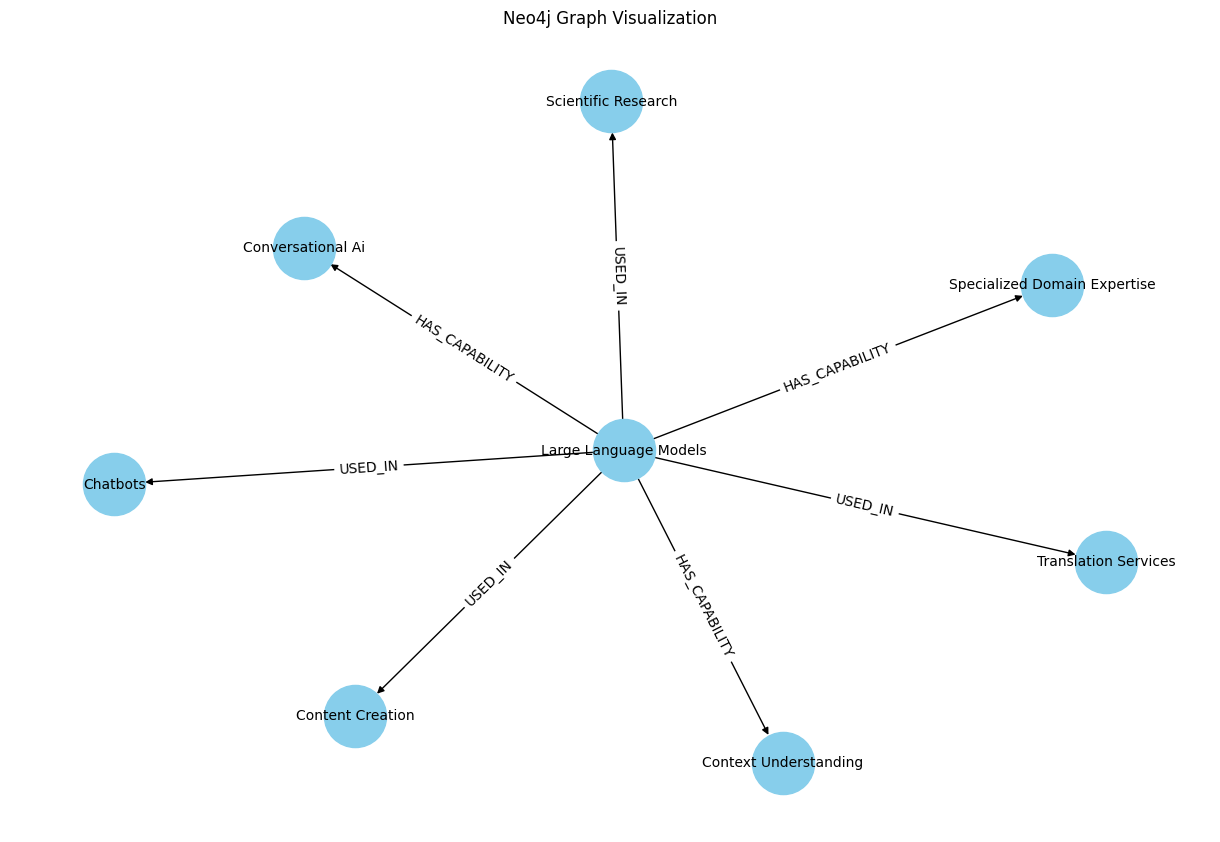

In [58]:
create_knowledge_graph_visual(get_results())

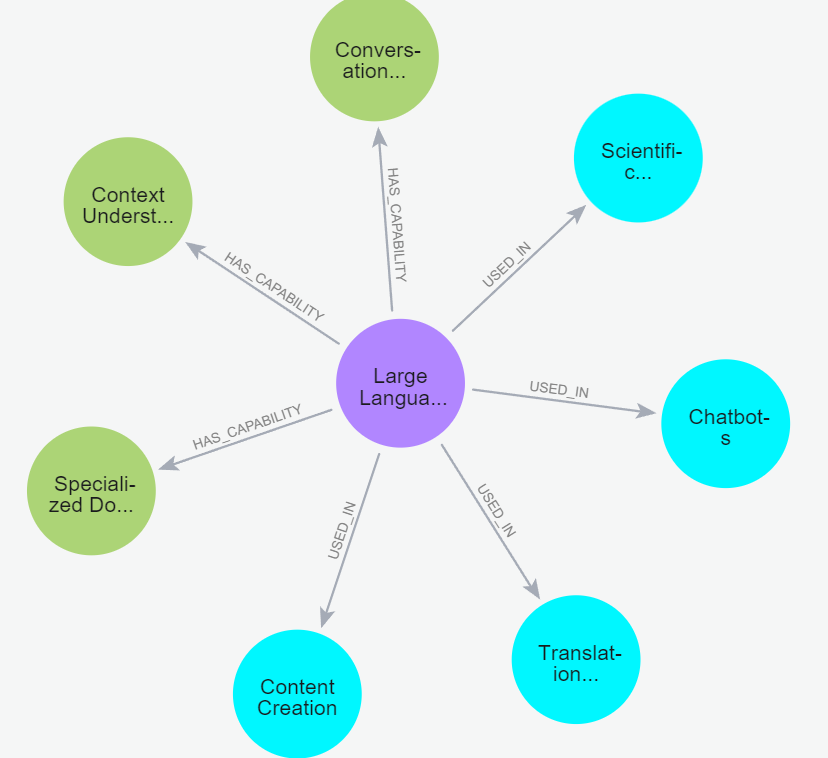

In [59]:
clean_graph()

In [60]:
# Define allowed nodes
allowed_nodes = ["Model", "Application", "Challenge", "Capability", "EthicalConcern"]

# Define allowed relationships
allowed_relationships = [
    ("Model", "USED_IN", "Application"),
    ("Application", "ADDRESSES", "Challenge"),
    ("Model", "HAS_CAPABILITY", "Capability"),
    ("Model", "RAISES_CONCERN", "EthicalConcern"),
    ("Capability", "RELATES_TO", "Challenge")
]

# Define node and relationship properties
node_properties = ["creation_date", "description", "version"]
relationship_properties = ["confidence_score", "impact_level"]

props_defined = LLMGraphTransformer(
  llm=llm,
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships,
  node_properties=node_properties,
  relationship_properties=relationship_properties
)
data = await props_defined.aconvert_to_graph_documents(documents)
graph.add_graph_documents(data)

In [61]:
data

[GraphDocument(nodes=[Node(id='Large Language Models', type='Model', properties={'description': 'advanced artificial intelligence systems designed to understand and generate human-like text', 'creation_date': '2023-10-01'}), Node(id="Openai'S Gpt Series", type='Model', properties={}), Node(id="Google'S Gemini", type='Model', properties={}), Node(id='Chatbots', type='Application', properties={}), Node(id='Content Creation', type='Application', properties={}), Node(id='Translation Services', type='Application', properties={}), Node(id='Scientific Research', type='Application', properties={}), Node(id='Conversational Ai', type='Capability', properties={}), Node(id='Context Understanding', type='Capability', properties={}), Node(id='Specialized Domain Expertise', type='Capability', properties={}), Node(id='Ethical Considerations', type='Challenge', properties={}), Node(id='Potential Biases In Training Data', type='Challenge', properties={}), Node(id='Computational Resources', type='Challen

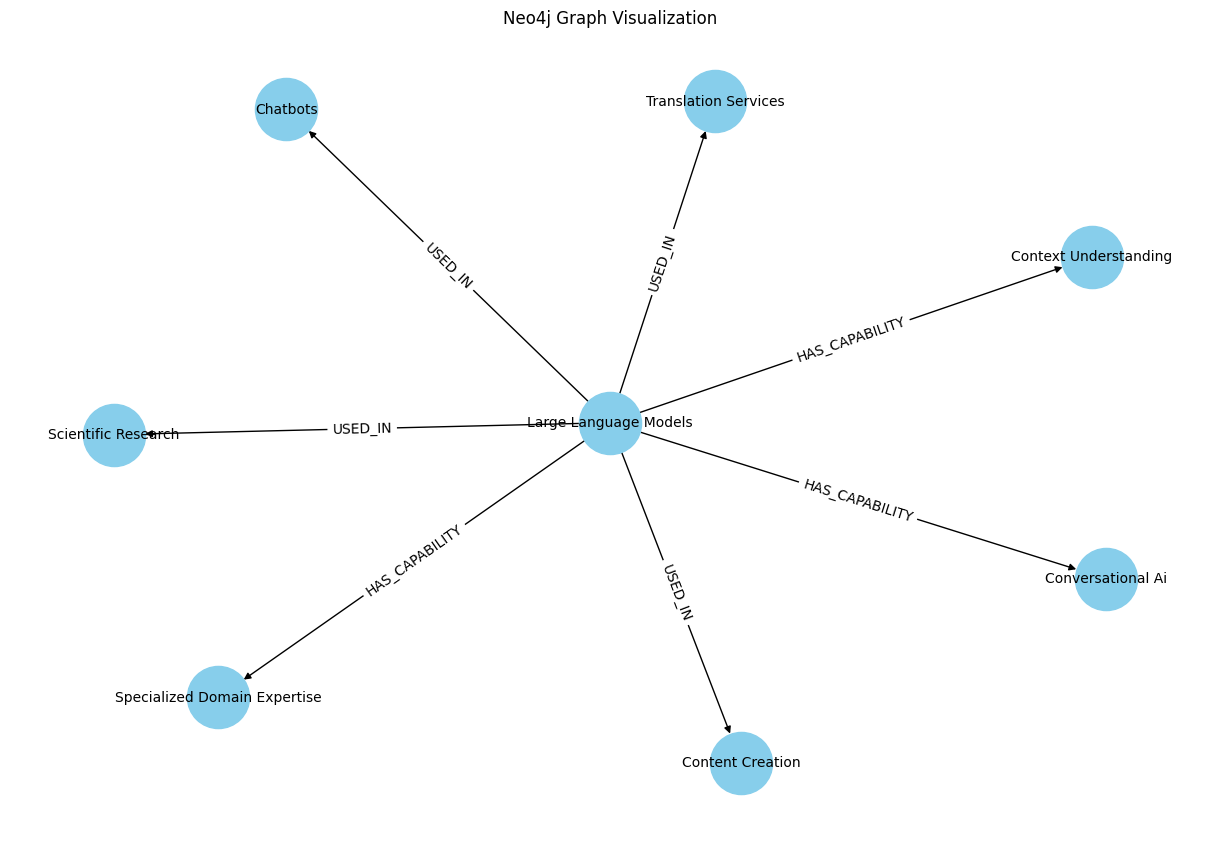

In [62]:
create_knowledge_graph_visual(get_results())

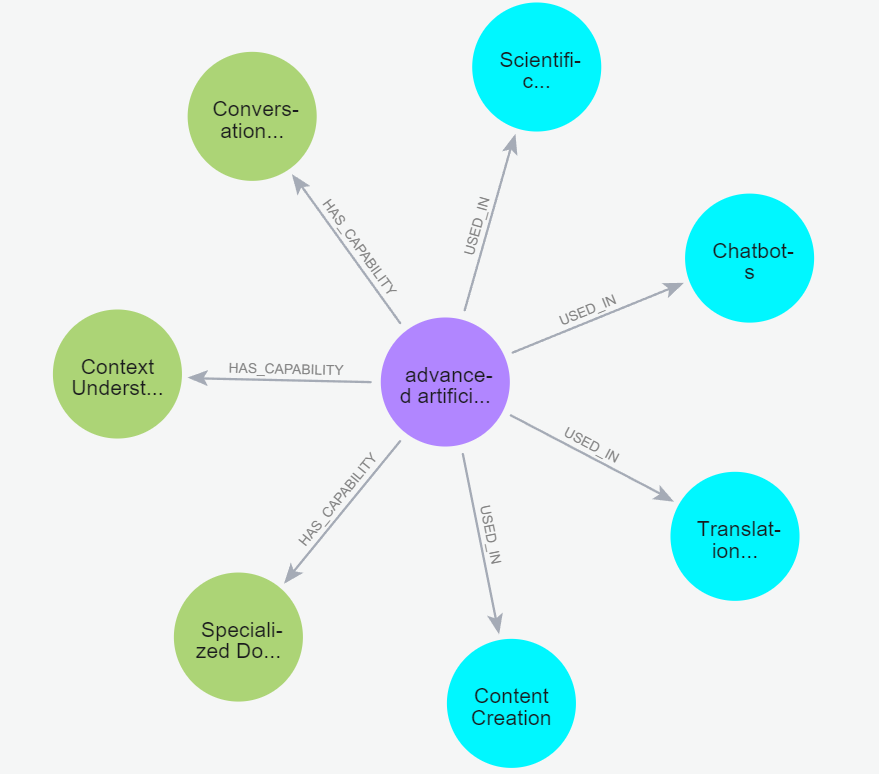

In [63]:
clean_graph()

###Strict mode


In [ ]:
LLMGraphTransformer(
  llm=llm,
  allowed_nodes=allowed_nodes,
  allowed_relationships=allowed_relationships,
  strict_mode=False
)

###Base entity label


In [ ]:
graph.add_graph_documents(data, baseEntityLabel=True)
clean_graph()

###Include source documents


In [ ]:
graph.add_graph_documents(data, include_source=True)